In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
from kan import MultKAN
from kan import *

# torch.set_default_dtype(torch.float32)
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).


In [8]:
model = KAN(width=[2,5,1], grid=3, k=3, seed=42)

checkpoint directory created: ./model
saving model version 0.0


In [9]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
# dataset['train_input']=dataset['train_input'].to(device)
# dataset['train_label']=dataset['train_label'].to(device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

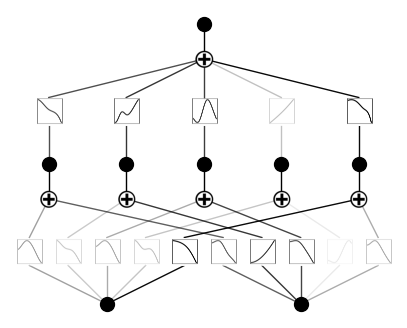

In [10]:
# plot KAN at initialization
# model.to(device)
model(dataset['train_input']);
model.plot()

In [11]:
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 1.54e-02 | test_loss: 1.60e-02 | reg: 3.50e+00 | : 100%|█| 50/50 [00:14<00:00,  3.34it

saving model version 0.1


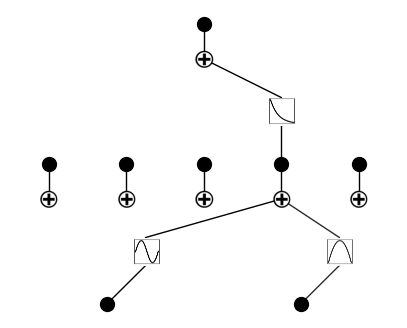

In [12]:
model.plot()

saving model version 0.2


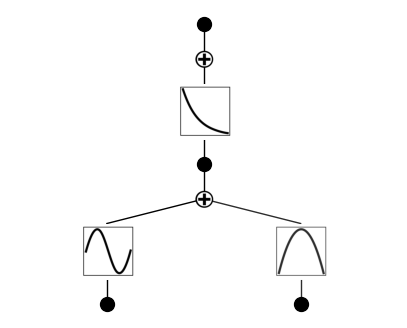

In [14]:

model = model.prune()
model.plot()

In [15]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.31e-02 | test_loss: 1.36e-02 | reg: 4.80e+00 | : 100%|█| 50/50 [00:04<00:00, 10.80it

saving model version 0.3


In [16]:
model = model.refine(10)

saving model version 0.4


In [17]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 2.73e-04 | test_loss: 3.08e-04 | reg: 4.80e+00 | : 100%|█| 50/50 [00:03<00:00, 12.99it

saving model version 0.5


In [18]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=1.000000238418579, c=2
fixing (0,1,0) with x^2, r2=1.0000005960464478, c=2
fixing (1,0,0) with exp, r2=1.0000004768371582, c=2
saving model version 0.6


In [19]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.20e-04 | test_loss: 1.16e-04 | reg: 4.80e+00 | : 100%|█| 50/50 [00:01<00:00, 27.15it


saving model version 0.7


In [20]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

0.9996*exp(1.0002*x_2**2 + 1.0002*sin(3.1417*x_1)) + 0.0004